# Lab 12: Data Visualization

Problem 1:

In [224]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [26]:
def plot_anscombe():
    a = np.load("anscombe.npy")
    x = np.linspace(0,20,1000)
    y = 0.5*x + 3
    
    plt.plot()
    for i in range(0,4):
        col = i*2
        plt.subplot(2, 2, i+1)
        plt.xlim(0,20)
        plt.plot(a[:,col], a[:,col+1], 'b+')
        plt.plot(x, y, 'r-')
        plt.axis('equal')
        
    plt.show()

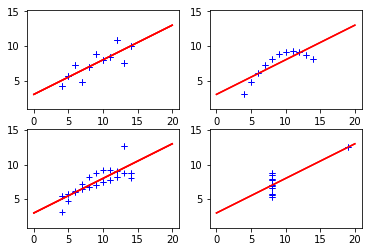

In [20]:
plot_anscombe()

Problem 2:

In [82]:
def bernstein(n, v, x):
    coef = scipy.special.binom(n,v)
    return coef*(x**v)*(1-x)**(n-v)
    
def plot_bernstein():
    plt.plot()
    x = np.linspace(0,1,1000)
    
    for i in range(4):
        plot_num = (i*4)+1
        for j in range(i+1):
            plt.subplot(4,4,plot_num)
            plt.plot(x, bernstein(i,j,x), 'b-')
            plt.axis([0,1,0,1.5])
            
            # adjusting labels
            plt.tick_params(which="both", top="off", right="off") 
            if plot_num not in range(13,17):
                plt.tick_params(labelbottom="off")
            if plot_num not in [1, 5, 9, 13]:
                plt.tick_params(labelleft="off")
            
            plot_num += 1
       
    plt.tight_layout()
    plt.show()
    

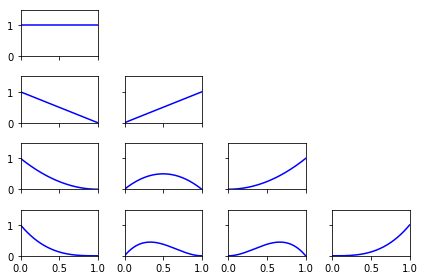

In [83]:
plot_bernstein()

Problem 3:

In [96]:
def plot_scatter():
    a = np.load('MLB.npy')
    height = a[:,0]
    weight = a[:,1]
    age = a[:,2]
    
    plt.figure(figsize=(6,12))
    
    plt.subplot(311)
    plt.scatter(weight, height, s=10)
    plt.grid()
    plt.xlabel("Weight (lbs)")
    plt.ylabel("Height (inches)")
    
    plt.subplot(312)
    plt.scatter(weight, age, s=10)
    plt.grid()
    plt.xlabel("Weight (lbs)")
    plt.ylabel("Age (yrs)")
    
    plt.subplot(313)
    plt.scatter(height, age, s=10)
    plt.grid()
    plt.xlabel("Height (inches)")
    plt.ylabel("Age (yrs)")
    
    plt.show()
    plt.close()
    

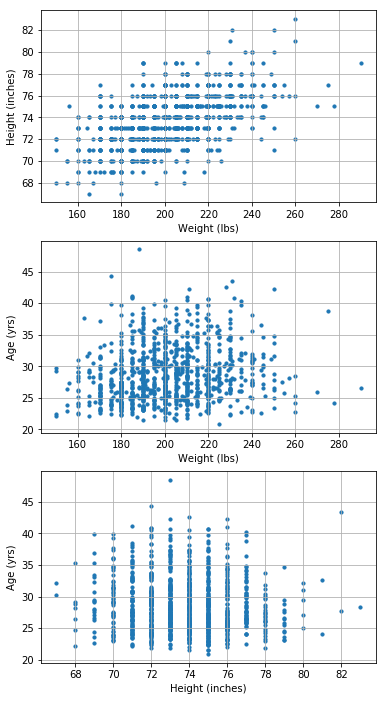

In [97]:
plot_scatter()

Problem 4:

In [218]:
def plot_earthquakes():
    a = np.load('earthquakes.npy')
    yr, mag, long, lat = a.T
    
    plt.figure(figsize=(15,20))
    
    # location and magnitude
    plt.subplot(311)
    plt.scatter(long, lat, s=mag, c=mag, alpha=.7)
    cbar = plt.colorbar()
    cbar.set_label("Magnitude (Richter)")
    plt.axis('equal')
    plt.ylabel("Longitude")
    plt.xlabel("Latitude")
    plt.title("Location and Magnitude")
    
    # magnitude histogram
    plt.subplot(312)
    freq, bin_edges = np.histogram(mag, bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.plot(bin_centers, freq, 'k-', lw=4)
    plt.xlabel("Magnitude (Richter scale)")
    plt.title("Frequency of earthquake strengths")
    
    # how many earthquakes per year?
    frequencies = np.zeros((10,2))
    for i in range(10):
        mask1 = a[:,0] >= (2000 + i)
        temp = a[mask1]
        mask2 = temp[:,0] < (2000 + i + 1)
        one_year = temp[mask2]
        rows, cols = one_year.shape
        frequencies[i] = (2000+i, rows)  
    
    plt.subplot(313)
    x = np.arange(2000,2010)
    y = frequencies[:,1]
    plt.bar(x, y)
    plt.xlabel("Year")
    plt.ylabel("Number of Earthquakes")
    plt.title("Number of earthquakes per year")
    plt.xticks(x)
    
    plt.suptitle("Earthquakes")
    plt.show()
    
    

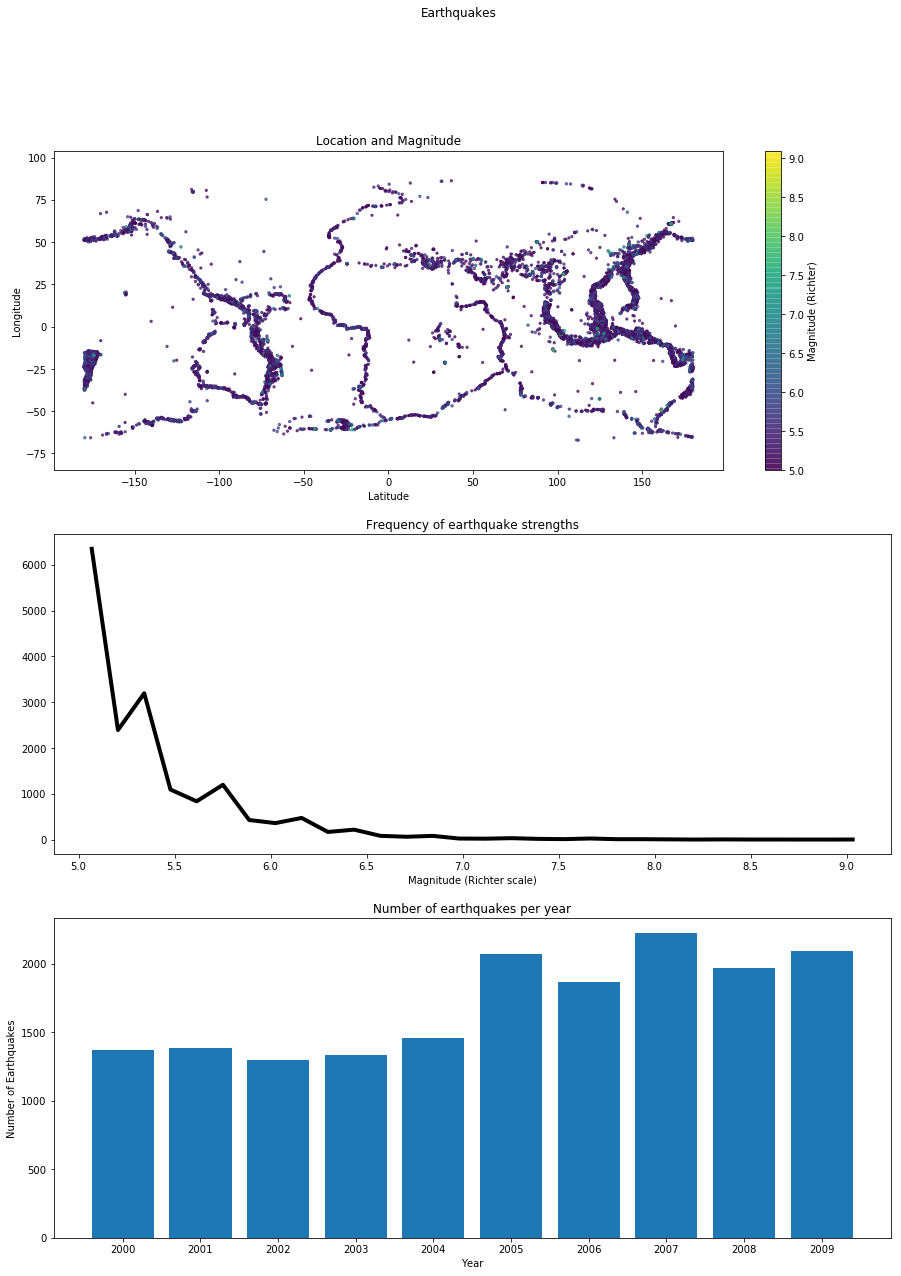

In [219]:
plot_earthquakes()

Problem 5:

In [254]:
def rosenbrock(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

def plot_rosenbrock():
    x = np.linspace(-6, 6, 600)
    X, Y = np.meshgrid(x, x.copy())
    Z = rosenbrock(X, Y)
    
    xtickvals = np.arange(-6,7)
    ytickvals = xtickvals.copy()
    
    plt.figure(figsize=(5,10))
    plt.subplot(211)
    plt.pcolormesh(X, Y, Z, cmap="plasma")
    plt.colorbar()
    plt.xticks(xtickvals)
    plt.yticks(ytickvals)
    plt.axvline(x=1, lw=1)
    plt.axhline(y=1, lw=1)
    
    plt.subplot(212)
    plt.contourf(X, Y, Z, 15, cmap="plasma", norm=LogNorm())
    plt.colorbar()
    plt.xticks(xtickvals)
    plt.yticks(ytickvals)
    plt.axvline(x=1, lw=1)
    plt.axhline(y=1, lw=1)
    
    plt.show()
    
    
    

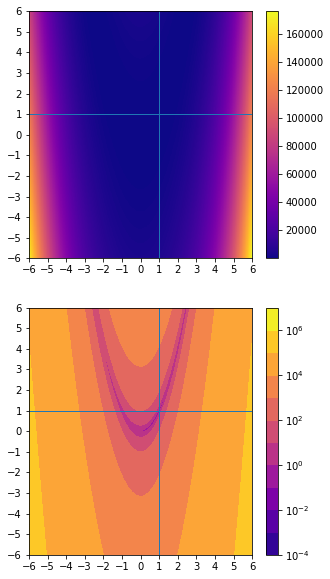

In [255]:
plot_rosenbrock()

Problem 6:

In [438]:
def plot_countries():
    a = np.load('countries.npy')
    countries = np.array(["Austria", "Bolivia", "Brazil", "China", 
                "Finland", "Germany", "Hungary", "India",
                "Japan", "North Korea", "Montenegro", "Norway",
                "Peru", "South Korea", "Sri Lanka", "Switzerland",
                "Turkey", "United Kingdom", "United States", "Vietnam"])
    
    plt.figure(figsize=(15,30))
    # Plotting GDP bar graph
    GDP = a[:,1]
    sort_mask = GDP.argsort()
    countries_sort = countries[sort_mask]
    GDP_sort = GDP[sort_mask]
    positions = np.arange(len(countries))
    
    plt.subplot(411)
    plt.barh(positions, GDP_sort)
    plt.yticks(positions, countries_sort)
    plt.xlabel("2015 GDP (Billions USD)")
    plt.title("Countries by 2015 GDP")
    
    # Plotting countries by per-capita GDP
    GDP_pc = GDP / a[:,0]
    sort_maskpc = GDP_pc.argsort()
    countries_sortpc = countries[sort_maskpc]
    GDP_sortpc = GDP_pc[sort_maskpc]
    
    plt.subplot(412)
    plt.barh(positions, GDP_sortpc)
    plt.yticks(positions, countries_sortpc)
    plt.xlabel("2015 Per-Capita GDP (Billions USD)")
    plt.title("Countries by 2015 Per-Capita GDP")
    
    
    # Plotting average male/female height against GDP
    maleh = a[:,2]
    femaleh = a[:,3]
    
    plt.subplot(413)
    plt.plot(GDP, maleh, '+', label='Men')
    plt.plot(GDP, femaleh, '+', label='Women')
    
    regm = np.polyfit(GDP, maleh, 1)
    regf = np.polyfit(GDP, femaleh, 1)
    x = np.arange(max(GDP))
    plt.plot(x, regm[0]*x + regm[1], 'b-')
    plt.plot(x, regf[0]*x + regf[1], 'r-')
    plt.legend()
    plt.title("Male/Female Height and GDP")
    plt.xlabel("GDP (Billions USD)")
    plt.ylabel("Height (cm)")
    
    # Plotting male/female height histogram
    
    plt.subplot(414)
    
    freq, bin_edges = np.histogram(maleh, bins=10)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.plot(bin_centers, freq, 'r-', lw=2, label="Men")
    freq, bin_edges = np.histogram(femaleh, bins=10)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    plt.plot(bin_centers, freq, 'b-', lw=2, label="Women")
    plt.legend()
    plt.xlabel("Average Height (cm)")
    plt.title("Male/Female Height Histogram")
    
    
    
    plt.show()
    

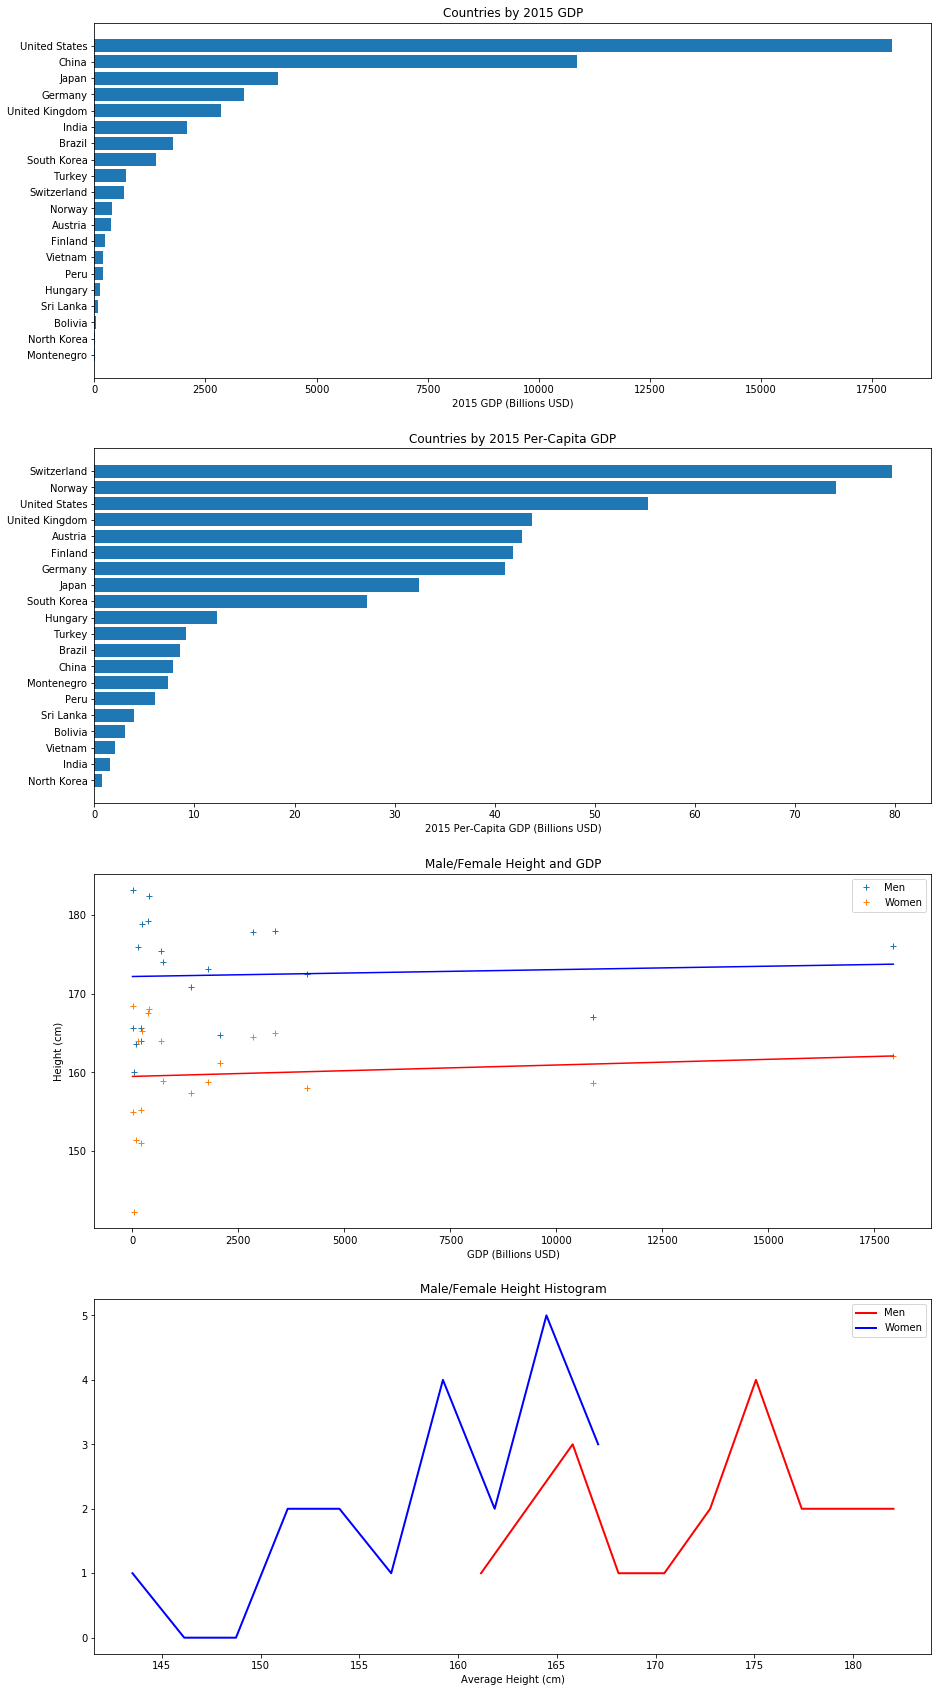

In [439]:
plot_countries()